# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## Roxanne Postell

## What does a Simple Linear Regression Model do?

#### It uses one independent variable to predict the value of a dependent variable

In [16]:
import pandas as pd
import seaborn as sns

In [17]:
data = sns.load_dataset('diamonds')

In [19]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)

$\bullet$ The r-value identifies linear correlations between each pair of numeric variables in a DataFrame.

$\bullet$ The range of possible vales for an r-value is -1.0 to 1.0.

$\bullet$ R-values that indicate positive correlation range from 0.01 to 1.00.

$\bullet$ To indicate a negative correlation, r-values range from -1.0 to -0.01.

$\bullet $R-values are interpreted to have no correlation at 0.00.

In [20]:
data.corr().head(7)

/var/folders/6_/y3stqft909qg42nwdmqy0hj40000gn/T/ipykernel_54451/2426653550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().head(7)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


/var/folders/6_/y3stqft909qg42nwdmqy0hj40000gn/T/ipykernel_54451/2987227011.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False),


<Axes: >

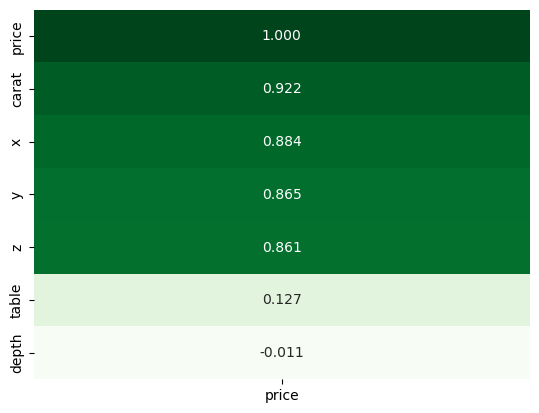

In [21]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split dataset
2. Create model from training dataset
3. Validate model with test dataset
4. If model is valid, predict data with it

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']], 
    test_size=0.30, random_state=20)

In [ ]:
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
model.score(x_test, y_test)

0.8504107786474794

In [35]:
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [39]:
predict_values = pd.DataFrame(y_predicted, columns=['Predicted_Price'])
predicted.head(3)

,Predicted_Price
0,9540.641914
1,1940.075433
2,3180.984246


In [45]:
joined = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
joined.head()

,Predicted_Price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [52]:
melted = pd.melt(joined, id_vars=['carat'], 
                 value_vars=['price','Predicted_Price'], 
                 var_name='price_type', value_name='price_value')

with pd.option_context('display.max_rows', 10):
    display(melted)

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,Predicted_Price,156.269013
32360,1.01,Predicted_Price,5585.245072
32361,1.53,Predicted_Price,9618.198715
32362,0.23,Predicted_Price,-464.185393


<Axes: xlabel='carat', ylabel='price_value'>

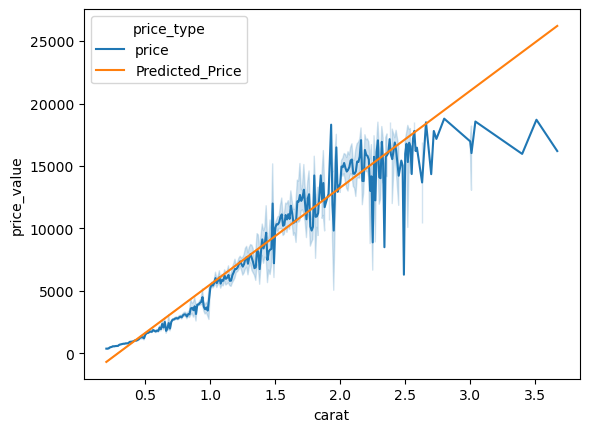

In [54]:
sns.lineplot(data=melted, x='carat', y='price_value', 
            hue='price_type')

## Regression line equation is $\mathbf{y = mx + b}$ , where...

$\bullet$ y is the dependent variable

$\bullet$ m is the slope of the line

$\bullet$ x is the dependent variable

$\bullet$ b is the Y-intercept 

In [55]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [56]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [57]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800453283


In [60]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800453283


In [81]:
x = 0.70
value = float((m * x) + b)
print(f'The predicted price for a 0.70 carat diamond is ${value:,.2f}')

The predicted price for a 0.70 carat diamond is $3,173.14


In [80]:
x = 0.54
value = float((m * x) + b)
print(f'The predicted price for a {x} carat diamond is ${value:,.2f}')

The predicted price for a 0.54 carat diamond is $1,932.11


The estimates in the previous two cells are close to the predicted prices in the results of step 18